In [33]:
library(repr)
library(tidyverse)
library(ggplot2)

# Predictive Factors in Subscription to Gaming-Related Newsletters

GitHub Repository: https://github.com/wandereryiu/dsci-100-2025W1-group-38

##### Group Members: Yi Yu Zhao, Oliver Hum, name3, name4

<br>

## Introduction

Based in the Department of Computer Science at the University of Columbia (UBC), the Pacific Laboratory for Artificial Intelligence (PLAI) is a research group who are focused on studying how players interact with virtual AI in video games. To study this, the PLAI has set up a Minecraft server thhat collects live data from players and corresponding observations. Player behaviour, skill development, and engagement patterns are all important factors in understanding player behaviour, skill development, and engagement patterns. The dataset provided by this project contains detailed observations for each player, containing each player's experience level (ie. classification as a Pro, Veteran, Regular, or Amateur), age, gender, and total hours played on the server. Additionally, the dataset records the player's subscription status to a gaming-related newsletter, which is the variable we will be using classification to predict. The previously mentioned factors are important in allowing us to explore how these predefined classes/categories help us predict labelling for similar, unlabelled data points.

<br>

## Methods & Results

To determine the exploratory relationship between the difference classes and subscription patterns to a gaming-related newsletter, we will use real, untested data obtained from the PLAI Minecraft server. The data set contains all relevant information in determining which player characteristics and behaviors are most predictive of subscribing to a game-related newsletter. More specifically, how the amount of played hours affect the variable of interest, and whether additional predictors such as experience level or gender contribute to the depth of analysis.

A classification model applying the k-nearest neighbours (kNN) will be used to determine the strength of relationship in predicting newsletter subscription. This report outlines the process of computing relevant summary statistics, exploratory data analysis on the dataset of interest, and evaluating the performance of the classification model in order to draw meaningful conclusions from the data.

<br>

In [3]:
# Loading the dataset

players_data <- read_csv("data/players.csv")

head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Issues with the dataset

An issue with the current dataset is that some players have 0.0 recorded hours played. This likely indicates that these players did not contribute meaningful gameplay data. In this case, it may be more appropriate to exclude these observations from the dataset when computing summary statistics, as including them could skew the results and provide an inaccurate representation of player behaviour.

There are also some observations in which players do not have an age, which could also affect the data. These observations may also be excluded.

For now, name and hashedEmail will be ignored in computing summary statistics.

In [4]:
# Filter out unwanted data

players_filtered <- players_data |>
    filter(played_hours != 0.0, 
           !is.na(Age)) |>
    select(-hashedEmail, -name)

head(players_filtered)

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Veteran,TRUE,1.6,Female,23


The original data set of players.csv had 196 observations. After removing observations in which the played hours was 0.0 and the age was NA, there were 109 observations remaining. 

### Data Analysis and Visualization

The broad question of interest that we will use to formulate our analysis:

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

Summary statistics and exploratory data analysis will be performed to identify any patterns in distributions or potential relationships between player characteristics and/or behaviours between attributes and subscription status. The factors that will be examined against subscription status are demographic factors (age and gender), player status (Pro, Veteran, Regular, Beginner, Amateur) and hours played.

Based on insights after calculating summary statistics and the corresponding visualizations, we will evaluate which variables show meaningful associations with subscription status. More specifically, visualizations generated from the exploratory data analysis will be examined to identify any patterns, trends, or correlations in how each player characteristic/behaviour relates to subscription status. This will guide the selection of factors that show meaningful association with our variable of interest to be used for our classification model. By choosing our predictors through exploratory data anaylsis, there is more confidence that the chosen predictors are both statistically relevant and straightforward.

<br>

In [8]:
# Perform summary statistics

experience_level_count <- players_filtered |>
    group_by(experience) |>
    summarise(count = n())

played_hours_summary <- players_filtered |>
    summarise(
        average_played_hours = mean(played_hours),
        median_played_hours = median(played_hours),
        min_played_hours = min(played_hours),
        max_played_hours = max(played_hours),
        sd_played_hours = sd(played_hours))

gender_count <- players_filtered |>
    group_by(gender) |>
    summarise(count = n())

age_summary <- players_filtered |>
    summarise(
        average_age = mean(Age),
        median_age = median(Age),
        min_age = min(Age),
        max_age = max(Age),
        sd_age = sd(Age))

subscribed_count <- players_filtered |>
    group_by(subscribe) |>
    summarise(count = n())

# Display results

experience_level_count
played_hours_summary
gender_count
age_summary
subscribed_count

experience,count
<chr>,<int>
Amateur,35
Beginner,19
Pro,10
Regular,19
Veteran,26


average_played_hours,median_played_hours,min_played_hours,max_played_hours,sd_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.50917,0.5,0.1,223.1,37.4496


gender,count
<chr>,<int>
Agender,1
Female,21
Male,75
Non-binary,6
Prefer not to say,5
Two-Spirited,1


average_age,median_age,min_age,max_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.30275,20,9,58,7.652771


subscribe,count
<lgl>,<int>
FALSE,25
TRUE,84


#### Data Analysis

**Overview of Played Hours and Age Statistics:**
Variable | Average | Median | Minimum | Max | Standard Deviation
--- | --- | --- | ---| --- | ---
Played hours | 10.51 | 0.50 | 0.10 | 223.10 | 37.45
Age | 21.302 | 20 | 9 | 58 | 7.65


<br>
After performing summary statistics, we can observe that:

- Approximately 77.06% of participants are subscribed to a gaming-related newsletter
- Approximately 55.96% of participants are male
- Approximately 68.81% of participants are either Amateur or Veteran gamers


#### Visualization

Following the summary statistics, visualizations will be generated to further examine how each player characteristic relates to subscription status and to identify any patterns, trends, or potential relationships between each variable and subscription status.

<br>


***Distribution of Experience Levels by Subscription Status***

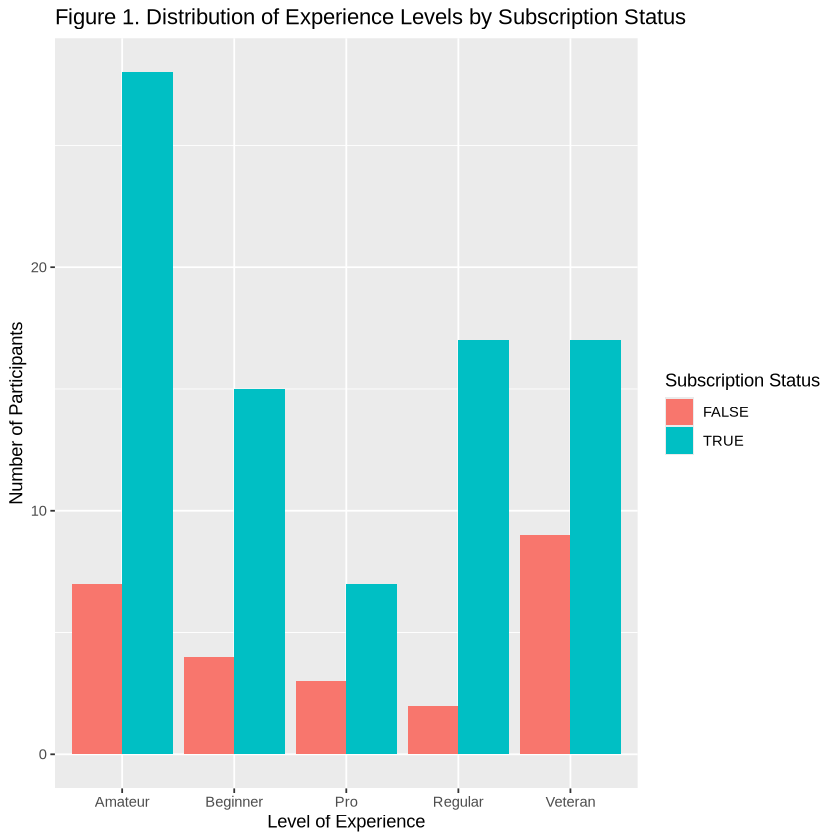

In [36]:
experience_bar_chart <- ggplot(players_filtered, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(x = "Level of Experience", y = "Number of Participants", 
         fill = "Subscription Status",
         title = "Figure 1. Distribution of Experience Levels by Subscription Status")

experience_bar_chart

For **Figure 1**, the bar heights illustrate how common each experience level is within the sample, while the color grouping allows for comparison of newsletter subscription status across these levels. The visualization shows that the Amateur group has both the largest number of participants and the highest proportion of subscribers. This suggests that players with lower experience levels may be more inclined to engage with the newsletter. In contrast, the Pro group has the smallest number of participants and the lowest subscription rate, indicating that more experienced players are less likely to subscribe.

<br>

***Hours Played by Subscription Status***

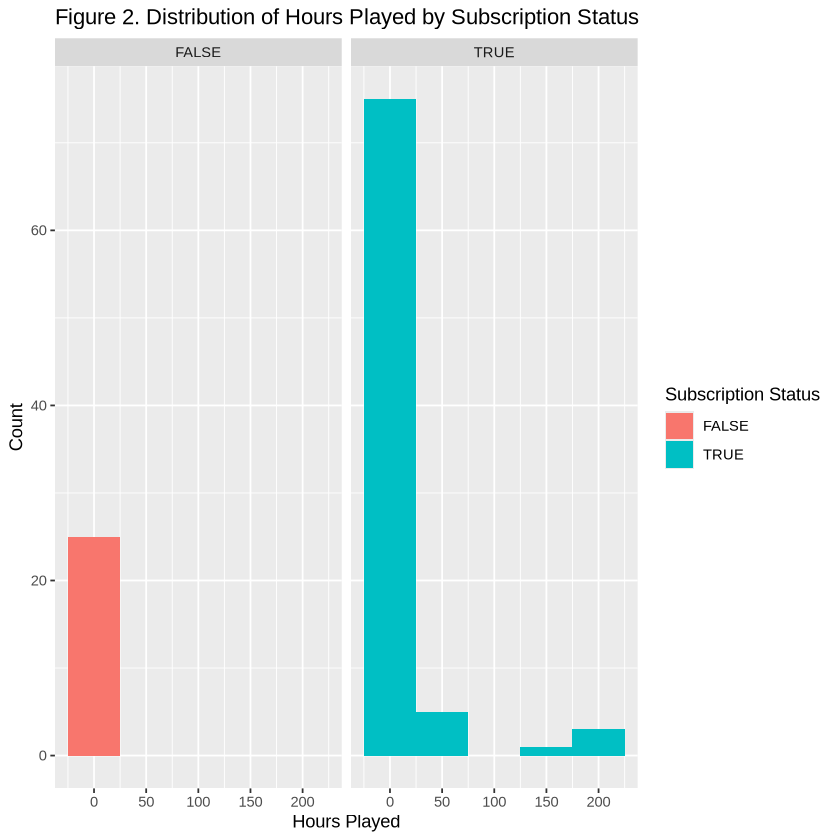

In [22]:
played_hours_plot <- ggplot(players_filtered, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 50) +
    facet_wrap(~ subscribe) +
    labs(x = "Hours Played", y = "Count", fill = "Subscription Status",
            title = "Figure 2. Distribution of Hours Played by Subscription Status")

played_hours_plot

In this graph (**Figure 2**), the height of each bar represents the number of hours spent playing the game, while the colors indicate subscription status. The visualization shows that a larger proportion of gameplay hours comes from players who are subscribed to the newsletter. This suggests that newsletter subscribers tend to spend more time playing the game compared to non-subscribers.

<br>

***Subscription Status Across Different Genders***

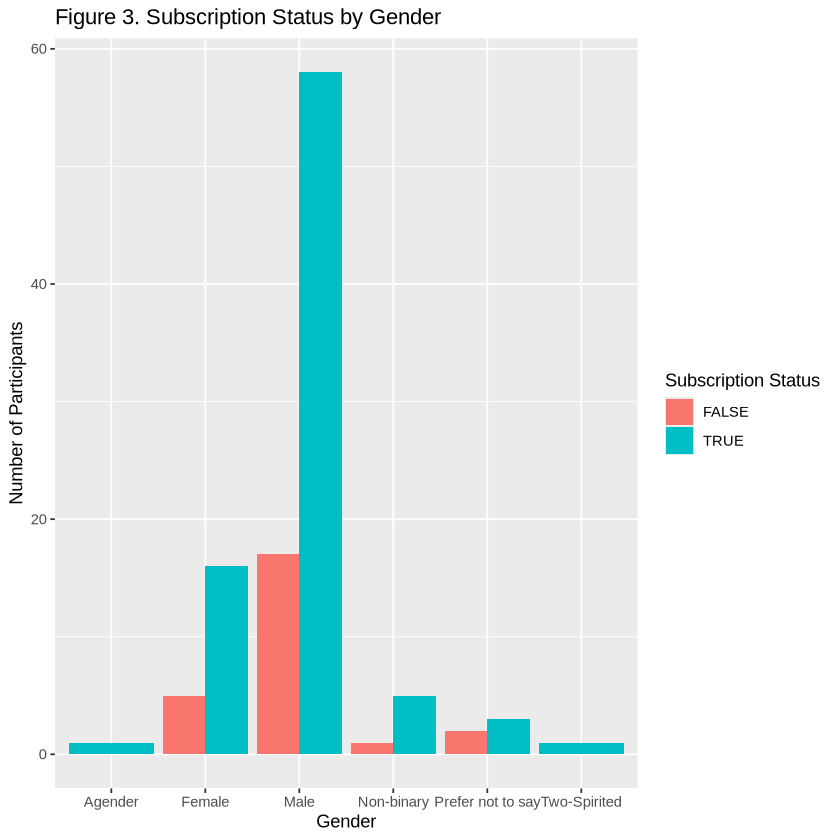

In [27]:
gender_plot <- ggplot(players_filtered, aes(x = gender, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(x = "Gender", y = "Number of Participants", 
         fill = "Subscription Status",
         title = "Figure 3. Subscription Status by Gender")

gender_plot

**Figure 3** illustrates the distribution of participants across different genders, with bar fill representing subscription status. The height of each bar indicates the number of participants within each gender category. The graph shows that the majority of participants are male, and among them, most are subscribed to the newsletter. These results suggest that not only are males the predominant players of the game, but they are also the most likely to subscribe to the game-related newsletter.

<br>

**Distribution of Age by Subscription Status**

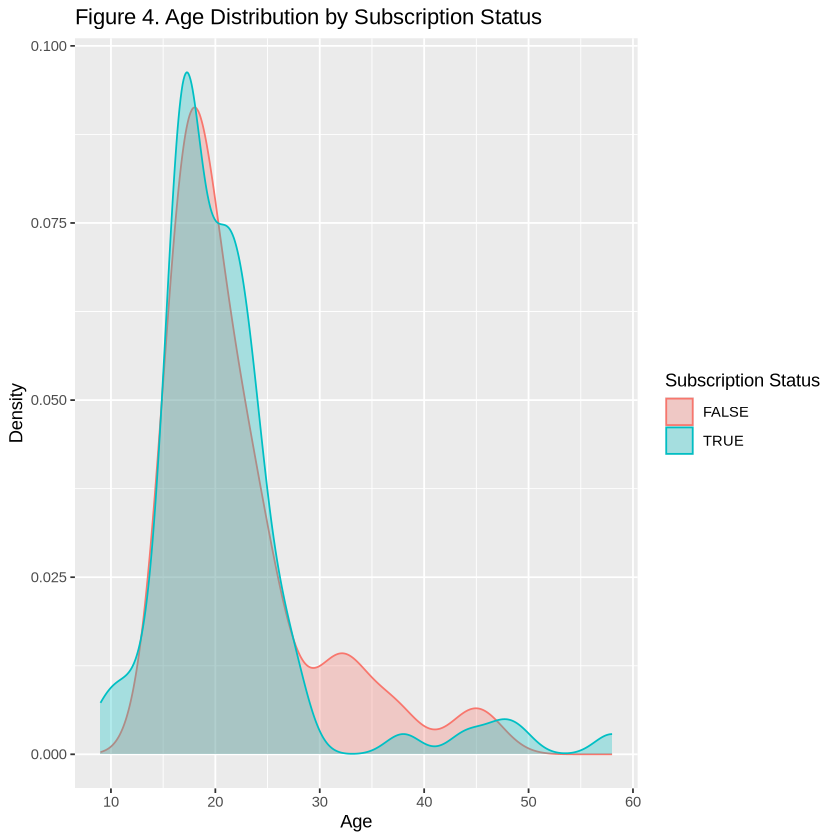

In [35]:
age_chart <- ggplot(players_filtered, aes(x = Age, color = subscribe, fill = subscribe)) +
    geom_density(alpha = 0.3) +
    labs(x = "Age", y = "Density", 
         title = "Figure 4. Age Distribution by Subscription Status", 
         color = "Subscription Status", 
         fill = "Subscription Status")

age_chart

**Figure 4** depicts the age distribution of participants, separated by subscription status. The density curves indicate that most participants, regardless of subscription status, are clustered around younger ages. However, a slightly higher density of newsletter subscribers is observed among the younger age ranges compared to non-subscribers. In contrast, non-subscribers appear slightly more represented in older age ranges. This suggests that younger players are more *slightly* more likely to subscribe to the game-related newsletter, while older players are less likely to do so. However, there is only a very small difference in subscription status between the younger ages, so age is unlikely to be a strong predictor of subscription status for the classification models.

<br>

#### Observation

By looking at the exploratory visualizations, we infer that the biggest difference in subscription status lies in played_hours. When looking at age, gender and level of experience, there was no noticeable difference in subscription status between groups. 

The question formulated based on the visualizations is:

**Can the number of hours played predict subscription to gaming-related newsletters in the observed players?**

### Classification

In [27]:
# Perform classification using kNN model 
# split data into two sets: training set and test set to determine how accurate played_hours is



## Discussion

- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

<br>


## References 

*may not actually be needed